In [18]:
import networkx as nx 

sizes = [75, 75, 300]

probs = [[0.25, 0.05, 0.02], [0.05, 0.35, 0.07], [0.02, 0.07, 0.40]]

g = nx.stochastic_block_model(sizes, probs, seed=0)

len(g)

450

In [19]:
import numpy as np
# A = np.random.randint(0,2,(200,200))
# # a = np.random.randint(0,3,(200,))
# a = np.array([0]*40+[1]*60+[2]*100)
# Z = np.zeros((a.size, a.max() + 1))
# Z[np.arange(a.size), a] = 1


In [20]:
labels_true = np.repeat(np.arange(3),sizes)
Z = np.zeros((sum(sizes), 3))
Z[np.arange(len(labels_true)), labels_true] = 1

In [21]:
A = nx.adjacency_matrix(g).todense()

In [22]:
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
M = np.linalg.pinv(Z.T@Z)
means = M@Z.T@A@Z@M
means

array([[0.24177778, 0.05066667, 0.0216    ],
       [0.05066667, 0.34346667, 0.06995556],
       [0.0216    , 0.06995556, 0.40375556]])

In [24]:
Z[13,:]

array([1., 0., 0.])

In [29]:
estimative_1 = Z@means@Z.T
Z_prime = Z.copy()
Z_prime[13,:] = 0
Z_prime[13,1] = 1
estimative_2 = Z_prime@means@Z_prime.T

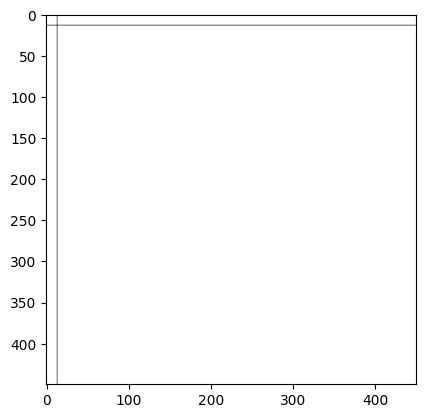

In [30]:
import matplotlib.pyplot as plt
g = (estimative_1 != estimative_2)
plt.imshow(g, cmap='Greys')

In [ ]:
import torch
sparse = torch.tensor(A).to_sparse()
sparse.values()

tensor([1, 1, 1,  ..., 1, 1, 1])

In [ ]:
sparse.indices()

tensor([[  0,   0,   0,  ..., 199, 199, 199],
        [  0,   1,   5,  ..., 195, 196, 199]])

In [ ]:
idx = sparse.indices()
A[idx[0,2],idx[1,2]]

1

In [ ]:
A[0,5],A[5,0]

(1, 0)

In [ ]:
"""
.to_sparse() encodes i->j that are 1
"""

'\n.to_sparse() encodes i->j that are 1\n'

In [ ]:
type(sparse)

torch.Tensor

In [ ]:
sparse.indices()[0,:]

tensor([  0,   0,   0,  ..., 199, 199, 199])

In [ ]:
Z_tensor = torch.tensor(Z,dtype=torch.float32)
Z_tensor.T@torch.sparse.mm(sparse.type(torch.FloatTensor),Z_tensor)

tensor([[ 793., 1227., 1978.],
        [1208., 1774., 2962.],
        [1965., 2981., 4999.]])

In [ ]:
"""
a_ij means there's a link i->j
Z.T@A[k,i] measures the total of links arriving from community k in node i
(Z.T@A@Z)[k,l] measures the total of links arriving from community k in node l
"""

"\na_ij means there's a link i->j\nZ.T@A[k,i] measures the total of links arriving from community k in node i\n(Z.T@A@Z)[k,l] measures the total of links arriving from community k in node l\n"

In [ ]:
m = Z.sum(axis=0)
np.outer(m,m)*(np.ones((3,3))*0.7)

array([[1120., 1680., 2800.],
       [1680., 2520., 4200.],
       [2800., 4200., 7000.]])

In [ ]:
sparse.indices()[0,:]

tensor([  0,   0,   0,  ..., 199, 199, 199])

In [ ]:
!pip install torch-geometric
from torch_geometric.utils import from_networkx, to_dense_adj
to_dense_adj(sparse.indices()).numpy()[0]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


array([[1., 1., 0., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
idx = sparse.indices()
to_dense_adj(idx[:,torch.where(idx[0,:] == 6)[0]]).shape

torch.Size([1, 199, 199])

In [ ]:
idx[1,torch.where(idx[0,:] == 6)[0]].max()

tensor(198)